In [2]:
import csv
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import pandas_datareader.data as web
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
from matplotlib import pyplot
import scipy.stats
%matplotlib inline

In [3]:
fpath = 'facebook_data_businessinsider_comments_sentiment.tsv'
post_data = pd.read_csv(fpath, sep='\t')
post_data.head()

C:\Users\Windows\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,PostID,PostDate,CommentID,CommentDate,CommenterURL,CommentText,PositiveScore,NegativeScore,NeutralScore,...,TokenQnt,PositiveScoreAvg,NegativeScoreAvg,NeutralScoreAvg,SentimentScoreAvg,Vader_Positive,Vader_Negative,Vader_Neutral,Vader_Compound,Flair_Score
0,1,1.015863e+16,2021-04-05 19:59:00,10158633048804071,2021-04-21 03:25:07.571562,arron.swarts.1?fref=nf&rc=p&refid=52&__tn__=R,Think you lean towards empty water turning.......,0.125,0.250,3.625,...,4,0.031250,0.062500,0.906250,-0.03125,0.000,0.205,0.795,-0.2023,-0.9772
1,2,1.015863e+16,2021-04-05 19:59:00,10158633047079071,2021-04-21 03:25:08.313604,arron.swarts.1?fref=nf&rc=p&refid=52&__tn__=R,They try too fine sailers and get money for th...,0.375,0.000,2.625,...,3,0.125000,0.000000,0.875000,0.12500,0.113,0.195,0.692,-0.3182,-0.9990
2,3,1.015863e+16,2021-04-05 19:59:00,10158648483794071,2021-04-21 03:25:09.018738,liziqian314?fref=nf&rc=p&refid=52&__tn__=R,"A few days ago, Bitcoin continued to rise to a...",0.500,1.250,8.250,...,10,0.050000,0.125000,0.825000,-0.07500,0.000,0.045,0.955,-0.1513,-0.9990
3,4,1.015863e+16,2021-04-05 19:59:00,10158637366634071,2021-04-21 03:25:09.751900,robert.vanriezen?fref=nf&rc=p&refid=52&__tn__=R,America looks like they got a real President r...,1.500,0.375,7.125,...,9,0.166667,0.041667,0.791667,0.12500,0.208,0.098,0.694,0.5106,0.9972
4,5,1.015863e+16,2021-04-05 19:59:00,10158680741234071,NaN,richard.altman.718?fref=nf&rc=p&refid=52&__tn...,Rick scott is out of his mind to give trump th...,0.125,0.000,4.875,...,5,0.025000,0.000000,0.975000,0.02500,0.200,0.000,0.800,0.5423,-0.9942


In [4]:
post_data['Vader_Average'] = post_data['Vader_Positive'] - post_data['Vader_Negative']

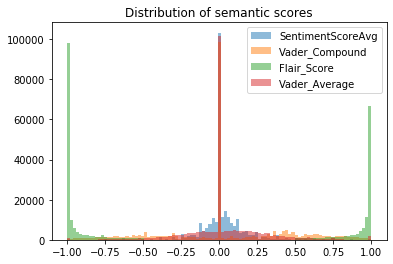

In [5]:
bins = np.linspace(-1, 1, 100)
pyplot.hist(post_data['SentimentScoreAvg'], bins, alpha=0.5, label='SentimentScoreAvg')
pyplot.hist(post_data['Vader_Compound'], bins, alpha=0.5, label='Vader_Compound')
pyplot.hist(post_data['Flair_Score'], bins, alpha=0.5, label='Flair_Score')
pyplot.hist(post_data['Vader_Average'], bins, alpha=0.5, label='Vader_Average')
pyplot.legend(loc='upper right')
pyplot.title('Distribution of semantic scores')
pyplot.show()

Text(0, 0.5, 'Posts')

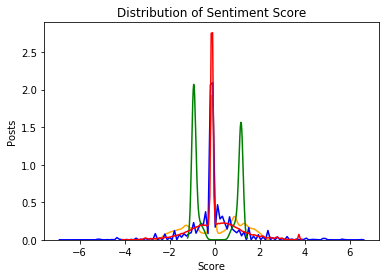

In [6]:


# seaborn histogram
sns.distplot((post_data['Vader_Compound'] - post_data['Vader_Compound'].mean())/post_data['Vader_Compound'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'orange',
             hist_kws={'edgecolor':'black'})
sns.distplot((post_data['SentimentScoreAvg'] - post_data['SentimentScoreAvg'].mean())/post_data['SentimentScoreAvg'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
sns.distplot((post_data['Flair_Score'] - post_data['Flair_Score'].mean())/post_data['Flair_Score'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'green',
             hist_kws={'edgecolor':'black'})
sns.distplot((post_data['Vader_Average'] - post_data['Vader_Average'].mean())/post_data['Vader_Average'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'red',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of Sentiment Score')
plt.xlabel('Score')
plt.ylabel('Posts')

In [7]:
post_data[['SentimentScoreAvg','Vader_Compound','Flair_Score','Vader_Average']].describe()

,SentimentScoreAvg,Vader_Compound,Flair_Score,Vader_Average
count,263695.000000,263695.000000,263695.000000,263695.000000
mean,0.020565,0.047926,-0.115834,0.032074
std,0.149799,0.437232,0.936714,0.258374
min,-1.000000,-0.999700,-1.000000,-1.000000
25%,-0.006579,-0.128000,-0.997400,-0.030000
50%,0.000000,0.000000,-0.783400,0.000000
75%,0.062500,0.381800,0.980700,0.133000
max,1.000000,0.999800,1.000000,1.000000


In [8]:
post_data['PostDate'] = pd.to_datetime(post_data['PostDate'], errors='coerce')

post_data['DateMonth'] = post_data['PostDate'].dt.strftime('%Y-%m')
post_data['DateDay'] = post_data['PostDate'].dt.strftime('%Y-%m-%d')

In [9]:
post_data['DateMonth'].head()

0    2021-04
1    2021-04
2    2021-04
3    2021-04
4    2021-04
Name: DateMonth, dtype: object

In [10]:
Monthly_Data = post_data.groupby('DateMonth').agg({'SentimentScore': 'sum'
                                                         ,'TokenQnt':'count'
                                                        ,'Vader_Compound':'mean'
                                                        ,'Vader_Average': 'mean'
                                                        ,'Flair_Score':'mean'})

In [11]:
DailyData = post_data.groupby('DateDay').agg({'SentimentScore': 'sum'
                                                         ,'TokenQnt':'count'
                                                        ,'Vader_Compound':'mean'
                                                        ,'Vader_Average': 'mean'
                                                        ,'Flair_Score':'mean'})

In [12]:
DailyData['SentimentScoreAdj'] = DailyData['SentimentScore']/DailyData['TokenQnt']
Monthly_Data['SentimentScoreAdj'] = Monthly_Data['SentimentScore']/Monthly_Data['TokenQnt']


In [13]:
DailyData.head()

,SentimentScore,TokenQnt,Vader_Compound,Vader_Average,Flair_Score,SentimentScoreAdj
DateDay,,,,,,
2013-05-01,6.375,18,0.226822,0.143111,0.077878,0.354167
2013-05-02,0.625,5,0.175680,0.121600,-0.933540,0.125000
2013-05-03,-2.000,12,0.129350,0.141917,-0.295417,-0.166667
2013-05-06,1.000,51,0.060031,-0.035490,-0.184737,0.019608
2013-05-07,0.250,4,-0.144575,0.020750,-0.468925,0.062500


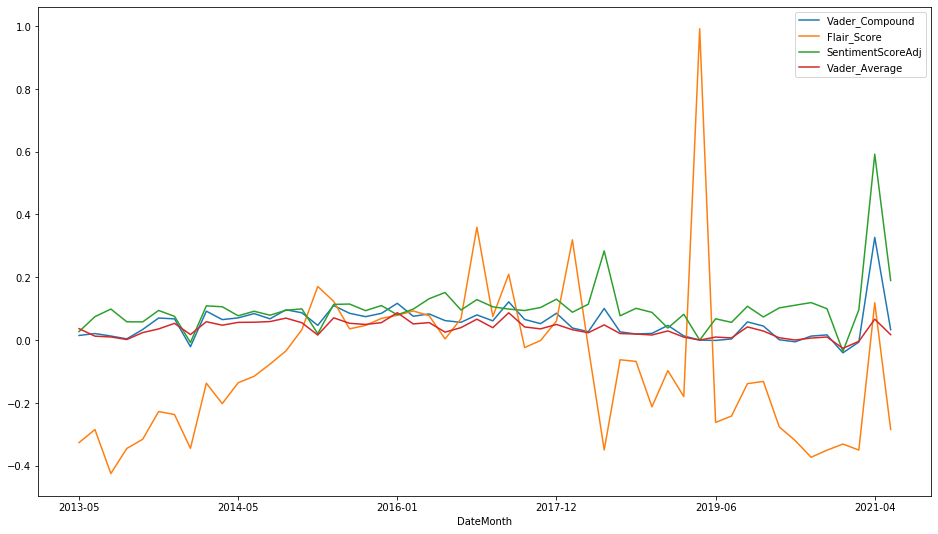

In [14]:
Monthly_Data[['Vader_Compound','Flair_Score','SentimentScoreAdj','Vader_Average']].plot(legend=True, figsize=(16,9))

## Download S&P from Yahoo

In [15]:
SnP_daily = web.get_data_yahoo('^GSPC','10/01/2010','05/01/2021',interval='d')
SnP_monthly = web.get_data_yahoo('^GSPC','10/01/2010','05/01/2021',interval='m')

In [16]:
SnP_monthly

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-10-01,1196.140015,1131.869995,1143.489990,1183.260010,89536270000,1183.260010
2010-11-01,1227.079956,1173.000000,1185.709961,1180.550049,87151070000,1180.550049
2010-12-01,1262.599976,1186.599976,1186.599976,1257.640015,80984530000,1257.640015
2011-01-01,1302.670044,1257.619995,1257.619995,1286.119995,92164940000,1286.119995
2011-02-01,1344.069946,1289.140015,1289.140015,1327.219971,59223660000,1327.219971
...,...,...,...,...,...,...
2021-01-01,3870.899902,3662.709961,3764.610107,3714.239990,105548790000,3714.239990
2021-02-01,3950.429932,3725.620117,3731.169922,3811.149902,98596960000,3811.149902
2021-03-01,3994.409912,3723.340088,3842.510010,3972.889893,120863560000,3972.889893


In [17]:
SnP_daily['LogReturn'] = np.log(SnP_daily['Adj Close']/SnP_daily['Adj Close'].shift(1))

In [18]:
SnP_monthly.index = SnP_monthly.index.strftime('%Y-%m')

In [19]:
SnP_monthly['LogReturn'] = np.log(SnP_monthly['Adj Close']/SnP_monthly['Adj Close'].shift(1))

## Granger test

In [20]:
Granger_data_daily = pd.merge(SnP_daily,DailyData, how= 'inner', left_index=True, right_index=True)

In [21]:
Granger_data_monthly = pd.merge(SnP_monthly,Monthly_Data, how= 'inner', left_index=True, right_index=True)

In [22]:
#Granger_data['SS_LogReturn'] = np.log((Granger_data['SentimentScoreAdj']+1)/(Granger_data['SentimentScoreAdj']+1).shift(1))

In [23]:
Granger_data_monthly

,High,Low,Open,Close,Volume,Adj Close,LogReturn,SentimentScore,TokenQnt,Vader_Compound,Vader_Average,Flair_Score,SentimentScoreAdj
2013-05,1687.180054,1581.280029,1597.550049,1630.739990,76447250000,1630.739990,0.020550,22.901000,846,0.014680,0.036403,-0.326486,0.027070
2013-06,1654.189941,1560.329956,1631.709961,1606.280029,74946790000,1606.280029,-0.015113,52.083492,698,0.020798,0.012500,-0.284925,0.074618
2013-07,1698.780029,1604.569946,1609.780029,1685.729980,68106820000,1685.729980,0.048278,43.375000,439,0.012944,0.009909,-0.425063,0.098804
2013-08,1709.670044,1627.469971,1689.420044,1632.969971,64802810000,1632.969971,-0.031798,61.970000,1063,0.003893,0.001834,-0.345129,0.058297
2013-09,1729.859985,1633.410034,1635.949951,1681.550049,66174410000,1681.550049,0.029316,83.625841,1444,0.033714,0.023862,-0.315943,0.057913
2013-11,1813.550049,1746.199951,1758.699951,1805.810059,63628190000,1805.810059,0.027663,195.133777,2067,0.070198,0.035524,-0.227587,0.094404
2013-12,1849.439941,1767.989990,1806.550049,1848.359985,64958820000,1848.359985,0.023289,267.267257,3537,0.067596,0.053238,-0.237077,0.075563
2014-01,1850.839966,1770.449951,1845.859985,1782.589966,75871910000,1782.589966,-0.036231,-1.478712,193,-0.021051,0.017601,-0.344739,-0.007662
2014-02,1867.920044,1737.920044,1782.680054,1859.449951,69725590000,1859.449951,0.042213,550.152596,5048,0.092132,0.058509,-0.137356,0.108984
2014-03,1883.969971,1834.439941,1857.680054,1872.339966,71885030000,1872.339966,0.006908,405.954589,3824,0.065195,0.047387,-0.202440,0.106160


In [29]:
gc_res = grangercausalitytests(Granger_data_daily[["Vader_Average","LogReturn"]].dropna(),11)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8725  , p=0.0908  , df_denom=467, df_num=1
ssr based chi2 test:   chi2=2.8909  , p=0.0891  , df=1
likelihood ratio test: chi2=2.8821  , p=0.0896  , df=1
parameter F test:         F=2.8725  , p=0.0908  , df_denom=467, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5077  , p=0.2225  , df_denom=464, df_num=2
ssr based chi2 test:   chi2=3.0479  , p=0.2179  , df=2
likelihood ratio test: chi2=3.0380  , p=0.2189  , df=2
parameter F test:         F=1.5077  , p=0.2225  , df_denom=464, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0839  , p=0.3556  , df_denom=461, df_num=3
ssr based chi2 test:   chi2=3.3010  , p=0.3475  , df=3
likelihood ratio test: chi2=3.2894  , p=0.3491  , df=3
parameter F test:         F=1.0839  , p=0.3556  , df_denom=461, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0190  , p=0.3970  

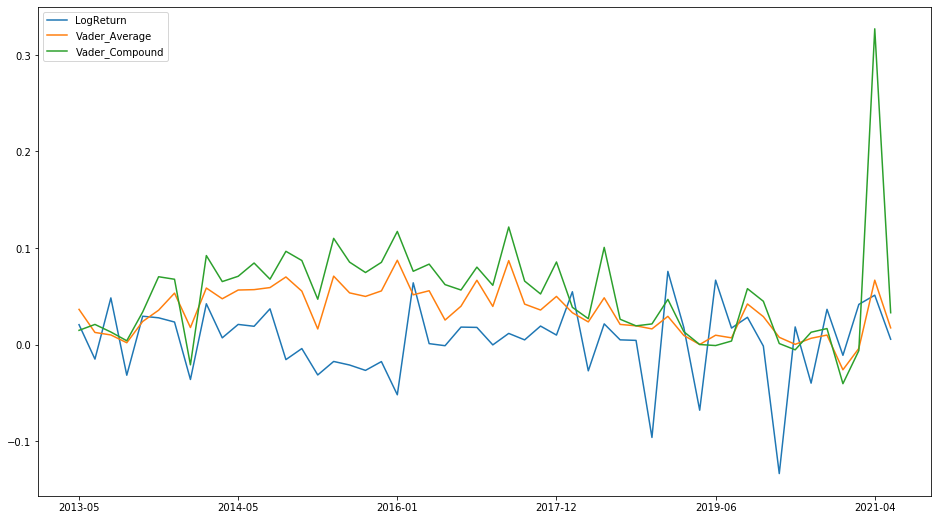

In [30]:
Granger_data_monthly[['LogReturn','Vader_Average','Vader_Compound']].plot(legend=True, figsize=(16,9))

In [31]:
corr = Granger_data_daily[['Vader_Compound','Flair_Score','SentimentScoreAdj','Vader_Average', 'LogReturn']].corr()
corr.style.background_gradient(cmap='coolwarm')

,Vader_Compound,Flair_Score,SentimentScoreAdj,Vader_Average,LogReturn
Vader_Compound,1.000000,0.456703,0.478741,0.832413,0.032546
Flair_Score,0.456703,1.000000,0.075213,0.504929,-0.031565
SentimentScoreAdj,0.478741,0.075213,1.000000,0.306344,0.011201
Vader_Average,0.832413,0.504929,0.306344,1.000000,0.030281
LogReturn,0.032546,-0.031565,0.011201,0.030281,1.000000


In [32]:
pvals = [] 
for col in ['Vader_Compound','Flair_Score','SentimentScoreAdj','Vader_Average']:
    pvals.append(scipy.stats.linregress(Granger_data_daily['LogReturn'][1:], Granger_data_daily[col][1:].dropna())[3])
corr_signif = pd.DataFrame(pvals,columns = ['p-value']
                           ,index = ['Vader_Compound','Flair_Score','SentimentScoreAdj','Vader_Average'])
corr_signif

,p-value
Vader_Compound,0.433884
Flair_Score,0.514228
SentimentScoreAdj,0.739774
Vader_Average,0.464033


In [34]:
pvals_mnt = [] 
for col in ['Vader_Compound','Flair_Score','SentimentScoreAdj','Vader_Average']:
    pvals_mnt.append(scipy.stats.linregress(Granger_data_monthly['LogReturn'][1:], Granger_data_monthly[col][1:].dropna())[3])
corr_signif_mnt = pd.DataFrame(pvals_mnt,columns = ['p-value']
                           ,index = ['Vader_Compound','Flair_Score','SentimentScoreAdj','Vader_Average'])
corr_signif_mnt

,p-value
Vader_Compound,0.129511
Flair_Score,0.400905
SentimentScoreAdj,0.133063
Vader_Average,0.291276
